# Quatrième compte rendu, Analyse Numérique

 
---

<center> Abstract </center>

Dans ce quatrième travail pratique, nous nous concentrons sur le calcul de valeurs propres via une approche numérique. L'objectif est alors d'implémenter, dans un premier temps, l'algorithme de la méthode de la puissance pour l'appliquer à deux matrices qui nous sont familières puis, dans un second celui de la méthode $QR$.

---

La recherche des valeurs propre d'un endomorphisme $A$ sur un espace $E$ en général égal ou assimilé à $\mathbb{R}^n$ peut s'avérer être une tâche laborieuse (surtout quand $\dim(E) > 2$ ). Les méthodes numériques sont alors là pour nous simplifier grandement le travail. En effet là où la méthode de la puissance utile pour étudier la convergence d'autres méthodes numériques, la méthode QR permet, quant à elle, d'obtenir le spectre $\text{sp}(A)$ tout entier.

Commençons sans plus attendre par la première méthode :

### Exercice 1 : Méthode de la puissance

In [39]:
# les eternels imports
import numpy as np
import numpy.linalg as la
import scipy as sp
import scipy.linalg as spla
import matplotlib.pyplot as plt

In [40]:
# deux petites commandes qui augmentent la lisibilité des matrices
np.set_printoptions(precision=2) # n'affiche que deux nombres après la virgule
np.set_printoptions(suppress=True) # lorsqu'un nombre est plus petit que l'erreur machine, numpy le remplace par 0
                                   # dans le but d'éviter d'avoir une matrice avec coefficient 1.2 * 10^{-302}

Dans un premier temps, nous définissons une première fonction qui permet d'évaluer la quantité $\langle Ax \vert x \rangle$ autant de fois que souhaité. Cette fonctions nous sera d'une grande aide lors des itérations de la méthode.

In [41]:
def evaluate_ax_dot_x(A, x0, nb_iter):
    # input : A : np array and nb_iter : integer
    x_iter = x0
    for i in range(nb_iter+1):
        y = np.dot(A, x_iter)
        x_iter = y / la.norm(y)
    return np.dot(np.dot(A, x_iter), x_iter)

Bien, désormais, nous allons appliquer la méthode de la puissance aux matrices suivantes :

$$ A_1 = \begin{pmatrix} 10 & 7 & 8 & 7 \\ 7 & 5 & 6 & 5 \\ 8 & 6 & 10 & 9 \\ 7 & 5 & 9 & 10 \end{pmatrix}$$

et $A_2$ est la matrice des différences finies déjà étudiée dans les précédents TP.

$$A_2 = \begin{pmatrix} 2 & -1 & & &\large{0} \\ -1 & 2 & -1 &  &  \\  & -1 & \ddots &   &  \\  &  & & \ddots & -1 \\ \large{0} & & & -1 & 2\end{pmatrix}$$

par ailleurs nous écrivons une fonction en python pour construire la matrice $A_2$ selon la dimension $n \in \mathbb{N}$ choisie.

In [42]:
n = 10
h = 1 / (n+1)

def construct_FDM_matrix(n):
    A = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            if i == j:
                A[i][j] = 2 / h**2
            if (j == i + 1 or j == i-1 or i == j-1 or i == j+1):
                A[i][j] = -1 / h**2
    return A

Dès lors nous nous appliquons à bien ajouter $A_1$ et $A_2$ dans notre programme

In [43]:
A1 = np.array([[10, 7, 8, 7],
              [7 , 5, 6, 5],
              [8, 6, 10, 9],
              [7, 5, 9, 10]], float)

A2 = construct_FDM_matrix(10)

##### Petit scénario :

Imaginons que nous sommes dans une situation où la résolution d'un système linéaire $Ax = b$ via la méthode de Jacobi ou Gauss-Seidel est d'une importance capitale. Il faut avant toute chose calculer les valeurs propres des matrices des itérations $B_J$ et $B_{GS}$, en effet il serait dommage de s'entêter à appliquer une méthode alors même qu'elle ne converge pas. Si le système en question est de taille $2 \times 2$, le calcul des valeurs propres se fait assez aisément (et les méthodes numériques peu pertinentes dans ce cas). Si en revanche, c'est un système $1000 \times 1000$, la méthode de la puissance nous sera d'une grande aide...

Et bien supposons qu'il n'y ait pas un mais deux systèmes à résoudre et que les matrices en question sont (par tout hasard) les matrices $A_1$ et $A_2$ définies plus tôt. Décomposons alors pour $i \in \{1, 2 \}$, les matrices $A_1$ et $A_2$ sous la forme $D_i - E_i - F_i$ déjà vue en cours et prenons les matrices $B_{J_i}$ et $B_{GS_i}$ définies par
$B_{J_i} = D_i^{-1}(E_i + F_i)$ et $B_{GS_i} = (D_i - E_i)^{-1}F_i$.

In [44]:
D1 = np.diag(np.diag(A1))
F1 = -(np.triu(A1) - D1)
E1 = -(np.tril(A1) - D1)
BJ1 = np.dot(la.inv(D1), E1 + F1)
BGS1 = np.dot(la.inv(D1 - E1), F1)

D2 = np.diag(np.diag(A2))
F2 = -(np.triu(A2) - D2)
E2 = -(np.tril(A2) - D2)
BJ2 = np.dot(la.inv(D2), E2 + F2)
BGS2 = np.dot(la.inv(D2 - E2), F2)

Il ne reste plus qu'a appliquer l'algorithme de la puissance aux matrices $B_{J_i}$ et $B_{GS_i}$, on s'assure de prendre un nombre suffisamment grand et on itère.

In [45]:
nb_iterations = 100


u = [1, 1, 1, 1]
v = [1 for _ in range(10)]

rj_1 = evaluate_ax_dot_x(BJ1, np.array(u, float), nb_iterations)
rgs_1 = evaluate_ax_dot_x(BGS1, np.array(u, float), nb_iterations)
rj_2 = evaluate_ax_dot_x(BJ2, np.array(v, float), nb_iterations)
rgs_2 =  evaluate_ax_dot_x(BGS2, np.array(v, float), nb_iterations)

print("BJ1", rj_1 )
print("BGS1", rgs_1)
print("BJ2", rj_2)
print("BGS2", rgs_2)

BJ1 -2.475791451151615
BGS1 0.9969014491757103
BJ2 0.9594929736144879
BGS2 0.9206267664157127


**Bonus** : Je me permets de mettre sur un graphe (un peu rudimentaire certes) les différents rayons spectraux trouvés ainsi que la droite d'équation $y = 1$ pour laquelle si un point est (sur ou) au dessus de la droite, alors la méthode ne converge pas. En l'occurrence on peut voir que toutes les méthodes convergent, sauf celle de Jacobi pour la matrice $A_1$

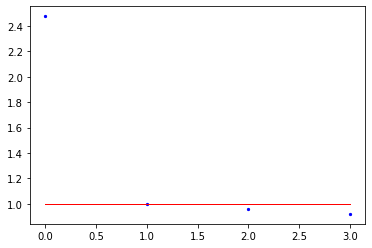

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter([0, 1, 2, 3], [np.abs(rj_1), rgs_1, rj_2, rgs_2], s=5, c='b')
ax1.plot([t for t in range(4)], [1 for _ in range(4)], 'r', lw=1)
plt.show()

**Remarque** : S'il est décidé de normaliser le produit $Ax$ par une autre norme que $||\cdot||_2$,  la méthode ne va jamais converger, en effet on rappelle que la norme  $||\cdot||_2$ est induite par le produit scalaire euclidien. Un correctif possible est alors de munir $\mathbb{R}^n$ d'un produit scalaire $\langle \cdot | \cdot \rangle $ puis normaliser par la nouvelle norme induite (attention, il faut s'assurer que l'identité du parallélogramme reste vérifiée pour le produit scalaire choisi). 


### Exercice 2 : La méthode QR


Comme rappelé dans l'énoncé, la méthode QR permet de trouver les valeurs propres d'une matrice. Pour ce faire, on procède à la décomposition $QR$ d'une matrice 

In [47]:
def qr_method(A, err):
    max_iter = 1000
    iter = 0
    B = A
    while iter < max_iter:
        q, r = la.qr(B)
        B = np.dot(r, q)
        iter += 1
    return B

In [55]:
M = np.random.random(16).reshape(4, 4) # On travaille dans M_4(R) donc on prend 16 coefficients pour générer M
P = np.dot(M.T, M)
Pinv = la.inv(P)

while la.det(P) <= 10e-7:
    # Jackpot !
    M = np.random.random(16).reshape(4, 4)
    P = np.dot(M.T, M)
    Pinv = la.inv(P)

D1 = np.diag([6, 5, 2, 1])
D2 = np.diag([5, 1, 2, 6])
D3 = np.diag([5, 3, 2, 3])
D4 = np.array([[5, 0, 0, 0], [0, 2, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]], float)


mat1 = np.dot(np.dot(P, D1), Pinv)
mat2 = np.dot(np.dot(P, D2), Pinv)
mat3 = np.dot(np.dot(P, D3), Pinv)
mat4 = np.dot(np.dot(P, D4), Pinv)

err = 10e-16

B1 = qr_method(mat1, err)

print(B1)

B2 = qr_method(mat2, err)
B3 = qr_method(mat3, err)
B4 = qr_method(mat4, err)

B4min = B4[2:, 2:]
ev = la.eigvals(B4min)

print("")

print(B4)

print(ev)

[[     6.        4.09    -89.11 -10359.75]
 [     0.        5.        7.79   1633.65]
 [     0.        0.        2.       77.92]
 [     0.        0.        0.        1.  ]]

[[    5.     -12.27   -24.09 -5748.15]
 [    0.       2.       3.91  -283.06]
 [    0.      -0.      -1.12  -126.39]
 [    0.       0.       0.       1.12]]
[-1.  1.]
